In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.5 MB/s eta 0:00:00


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("joeddav/xlm-roberta-large-xnli")

model = AutoModelForSequenceClassification.from_pretrained("joeddav/xlm-roberta-large-xnli")

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train_data = pd.read_csv("/content/Train.csv")

train_data.head(5)

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1
1,very practical and easy to use,app is user-friendly,1
2,this app is very good for video conferencing.,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1


In [ ]:
model.config.label2id

# {"contradiction": 0, "entailment": 1}

{'contradiction': 0, 'entailment': 2, 'neutral': 1}

In [ ]:
def get_tokens_xlmr_model(data):

  ''' Function which creats tokens for the passed data using xlmr model

  input — Dataframe

  Output — list of tokens '''

  batch_tokens = []

  for i in range(len(data)):

    tokens = tokenizer.encode(data["reason"][i], data["text"][i], return_tensors="pt", truncation_strategy="only_first")

    batch_tokens.append(tokens)

  return batch_tokens

In [ ]:
def get_predicts_xlmr_model(tokens):

  ''' Function which creats predictions for the passed tokens using xlmr model

  input — list of tokens

  Output — list of predictions '''

  batch_predicts = []
  k=0
  for i in tokens:

    predict = model(i)[0][0]

    predict = int(predict.argmax())

    batch_predicts.append(predict)
    k=k+1
    print(k)

  return batch_predicts

In [ ]:
train_data_tokens = get_tokens_xlmr_model(train_data)

train_data_predictions = get_predicts_xlmr_model(train_data_tokens)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<ipython-input-17-06d08cd4da0d>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.add.at(cm, [x, y], 1)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_cla

Classification report : 
                precision    recall  f1-score   support

contradiction       0.55      0.22      0.31      2061
      neutral       0.40      0.50      0.45      2061
   entailment       0.00      0.00      0.00         0

     accuracy                           0.36      4122
    macro avg       0.32      0.24      0.25      4122
 weighted avg       0.48      0.36      0.38      4122



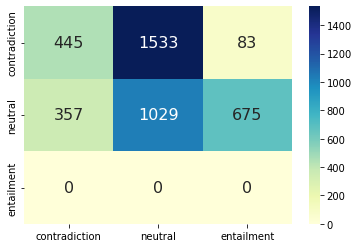

In [ ]:
import numpy as np

import seaborn as sns

from sklearn.metrics import classification_report

train_data["label"] = train_data["label"].astype(str).astype(int)

x = np.array(train_data["label"])

y = np.array(train_data_predictions)

cm = np.zeros((3, 3), dtype=int)

np.add.at(cm, [x, y], 1)

sns.heatmap(cm,cmap="YlGnBu", annot=True, annot_kws={"size":16}, fmt="g", xticklabels=["contradiction","neutral","entailment"], yticklabels=["contradiction","neutral","entailment"])

matrix = classification_report(x,y,labels=[0,1,2], target_names=["contradiction","neutral","entailment"])

print("Classification report : \n",matrix)